<font size="10" align="center"><b>Ericsson CORD-19 Challenge: Task7 AI-007 Model</b></font>

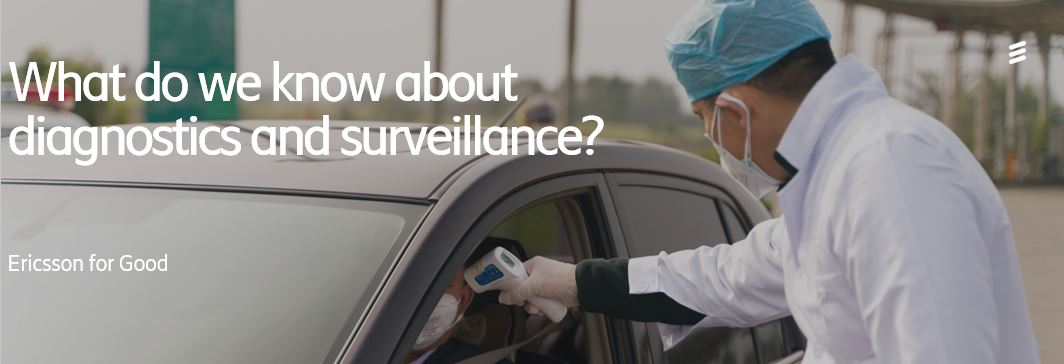

<div class="alert alert-block alert-info">
<font size="5"><b>Introduction</b></font>
<br>
<br>
Science and technology communities across the world have come together to address issues related to the COVID-19 virus and ensuing pandemic. The CORD-19 research dataset represents the most extensive machine-readable COVID-19 literature collection of over 59,000 scientific articles available for data mining to date. However, the rapid increase in the volume and type of COVID-19 literature makes it difficult for members of the medical community and policy makers to find what they need.
<br>
<br>
The focus of AI-007 was to create an artificial intelligence model that effectively searches the CORD-19 database and finds research papers answering the Task 7 questions: “*What do we know about diagnostics and surveillance?*” and “*What has been published concerning systematic, holistic approach to diagnostics (from the public health surveillance perspective to being able to predict clinical outcomes)?*”
<br>
<br>
This AI-007 model built on relevant research articles provided by kaggle to help the medical and policy maker communities to find answers on topic related diagnostics and surveillance relating to COVID-19.
<br>
<br>
By providing the research and tools needed to empower policy makers to lead and control this pandemic more effectively, this AI-007 model contributes to the ongoing COVID-19 response efforts worldwide.
</div>

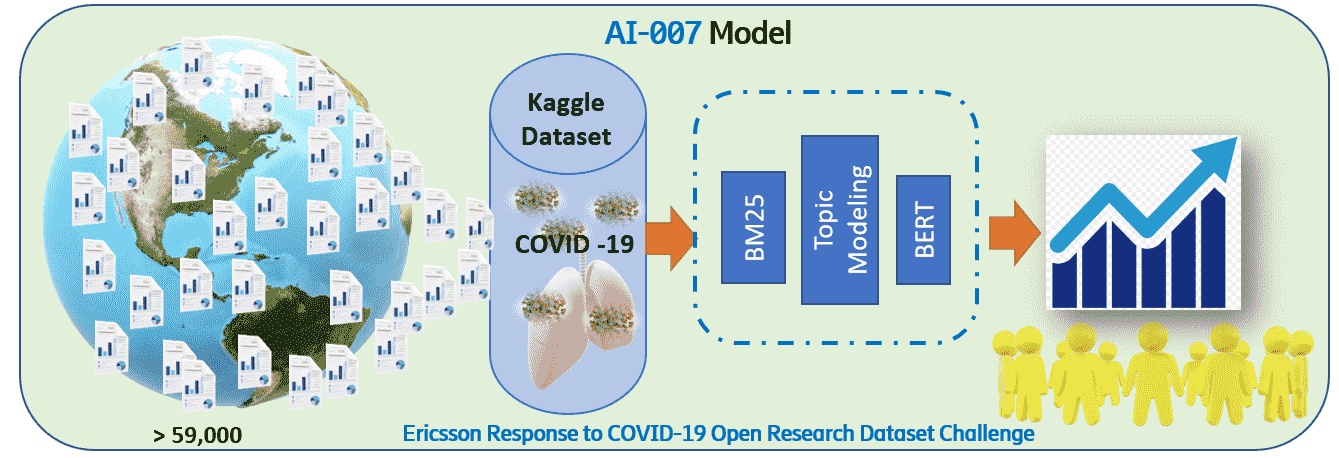

<div class="alert alert-block alert-info">
<font size="5"><b>Notebook Contents</b></font>
<br>
<br>
<ul><li>Our Overall Approach</li>
    <li>Pros and Cons of Our Approach</li>
    <li>Our Solution: Code and Results</li>
    <li>Acknowledgement and Licenses</li>
</ul>
<font size="5"><b>Summary of Approach</b></font>
<br>
<br>
<ul>
    <li>We started by preparing the COVID-19 dataset for efficient processing and analysis. This included consolidating data sources, keeping the most relevant columns of data, and then cleansing the data for easier analysis and input to the data models.</li>
    <li>Next, we minimized the number of articles to analyze by eliminating those that were not relevant to the subtasks on which we were focused.</li>
    <li>From there, we identified the dominant topics across the subtasks and used them to visualize the most relevant articles for each sub task.</li>
    <li>Later, we used SciBERT pretrained model with the dataset provided by Kaggle to identify the relavent articles.</li>
    <li>Lastly, we used 3 distance measures to identify the relavent articles.We displayed the responses to the subtasks follows,</li>
        <ul>
        <li><b>HTML Dropdown List</b></li>
        <li><b>HTML File</b></li>
        <li><b>Top 5 Articles</b></li>
        <li><b>Distance Measure Plot</b></li>
        </ul>
</ul>
    
<font size="4"><b>Prepare the Dataset for Processing</b></font>
<br>
<br>
An important technique that transforms the raw data into a format required for modeling, which results in retaining the critical keyword to improve the efficiency of the retrieval process, as well as the accuracy of the results. 
<br>
Activities involved in this step were:<br>
<ul>
    <li>Remove duplicate papers using <b>title</b> data attribute</li>
    <li>Remove punctuation, whitespace, stop words (library of words in English that are common words and not relevant to the article)</li>
    <li>Make all words lowercase for exact matching of words</li>
<li>Tokenize words so that each word can be used as an independent entity; each word is a token and additional preprocessing can be done.</li>
    <li>Remove non English articles</li>
</ul>
<font size="4"><b>Train Model</b></font>
<br>
<br>
We use a Bag_of_Words retrieval function called Okapi BM25 to select the top 100 articles related to each task query. BM25, abbreviation of Best Matching25, is a probabilistic information retrieval ranking method. It ranks documents based on a relevance score which is the probability of a document being relevant to the input query.
<br>
<br>
<font size="5"><b>Pros and Cons of the Approach</b></font>
<ul>
<br>
<br>
<li>We chose to start our approach by using the TF-ID word frequency model to create clusters of articles to find those related to our task 7 subtasks so we could then focus on that cluster of articles.</li>
<li>We quickly saw that no clear clusters were formed. With 59,000 plus articles, there were not enough relationships among the keywords from the articles to form clear clusters.</li>
<li>We quickly changed to Deep Learning algoritms like SciBERT, and  using different distance measure techniques to provide better results. We found, as a next generation SciBERT best-match model, it had more extensive capabilities to process high volumes of text to identify keywords and match them to relevant articles.</li>
</ul>
</div>

# Download and Preprocess the dataset from Kaggle

<div class="alert alert-block alert-info">
<b>Downloading</b><br>
It uses Kaggle API to download the CORD-19 Dataset.<br>
    Note: If you are using the Kaggle CLI tool, the tool will look for this token at ~/.kaggle/kaggle.json on Linux, OSX, and other UNIX-based operating systems, and at C:\Users<Windows-username>.kaggle\kaggle.json on Windows. If the token is not there, an error will be raised. Hence, once you’ve downloaded the token, you should move it from your Downloads folder to this folder.
<br>    
<b>PreProcessing</b><br>
An important technique that transforms the raw data into a format required for modeling, which results in retaining the critical keyword to improve the efficiency of the retrieval process, as well as the accuracy of the results. 
<br>
Activities involved in this step were:<br> 
&emsp;&emsp;a.	Discard non-English articles (less than 5%) <br> 
&emsp;&emsp;b.	Changing words to lower case (Lower_case) <br> 
&emsp;&emsp;c.	Remove stop_words <br> 
&emsp;&emsp;d.	Lemmatization to group together the inflected forms of a word so they can be analyzed as a single item <br> 
&emsp;&emsp;e.	Stemming to reduce inflected words to their word stem, base or root form—generally a written word form <br>
</div>

# **PIP Install of requried Libraries**# 

In [ ]:
!pip install rank_bm25
!pip install sentence_transformers
!pip install yattag

# *Import the required libraries*

In [ ]:
#Import of Required Libraries/functions
import os
import json
import scipy
import datetime as dt
from sentence_transformers import SentenceTransformer
import pickle
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from textblob import Word
import pandas as pd
nltk.download('stopwords')
exclude_list = string.digits + string.punctuation
table = str.maketrans(exclude_list, len(exclude_list)*" ")
stop = stopwords.words('english')
english_stopwords = list(set(stop))
import matplotlib.pyplot as plt

from gensim.summarization import summarize
# For Visualization
from IPython.core.display import HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout
import seaborn as sns
#Define dataPath to download files
dataPath = ("kaggleData")
downloadPath = ("/kaggle/input/CORD-19-research-challenge/")
checkfolder = os.path.isdir(dataPath)

# If folder doesn't exist, then create it.
if not checkfolder:
    os.makedirs(dataPath)

#Reading Data from JSON files
from os import walk
rootFolders = next(os.walk(dataPath))[1]

In [ ]:
#Define utilities for data parsing

def affiliation_parsing(x: dict) -> str:
    """Parse affiliation into string."""
    current = []
    for key in ['laboratory', 'institution']:
        if x['affiliation'].get(key):  # could also use try, except
            current.append(x['affiliation'][key])
        else:
            current.append('')
    for key in ['addrLine', 'settlement', 'region', 'country', 'postCode']:
        if x['affiliation'].get('location'):
            if x['affiliation']['location'].get(key):
                current.append(x['affiliation']['location'][key])
        else:
            current.append('')
    return ', '.join(current)


def cite_parsing(x: list, key: str) -> list:
    """Parse references into lists for delimiting."""
    cites = [i[key] if i else '' for i in x] #test['body_text']]
    output = []
    for i in cites:
        if i:
            output.append(','.join([j['ref_id'] if j['ref_id'] else '' for j in i]))
        else:
            output.append('')
    return '|'.join(output)


def extract_key(x: list, key:str) -> str:
    if x:
        return ['|'.join(i[key] if i[key] else '' for i in x)]
    return ''

extract_func = lambda x, func: ['|'.join(func(i) for i in x)]
format_authors = lambda x: f"{x['first']} {x['last']}"
format_full_authors = lambda x: f"{x['first']} {''.join(x['middle'])} {x['last']} {x['suffix']}"
format_abstract = lambda x: "{}\n {}".format(x['section'], x['text'])
all_keys = lambda x, key: '|'.join(i[key] for i in x.values())

In [ ]:
%%time

# This section converts all the JSON files to a aggregated dataframe
aggregate_dflist = []
for path in ['biorxiv_medrxiv', 'comm_use_subset', 'custom_license', 'noncomm_use_subset']:
    path
    for subpath in ['pdf_json','pmc_json']:
        if not os.path.exists(f'{downloadPath}/{path}/{path}/{subpath}/') : continue
        json_files = [file for file in os.listdir(f'{downloadPath}/{path}/{path}/{subpath}/') if file.endswith('.json')]
        df_list = []
                
        for js in json_files:
            
            with open(os.path.join(f'{downloadPath}/{path}/{path}/{subpath}', js)) as json_file:
                paper = json.load(json_file)
                
            paper_df = pd.DataFrame({
                'paper_id': paper['paper_id'],
                'title': paper['metadata']['title'],
                #'authors': extract_func(paper['metadata']['authors'], format_authors),
                #'full_authors': extract_func(paper['metadata']['authors'], format_full_authors),
                #'affiliations': extract_func(paper['metadata']['authors'], affiliation_parsing),
                #'emails': extract_key(paper['metadata']['authors'], 'email'),              
                'body': extract_func(paper['body_text'], format_abstract),
                #'body_cite_spans': cite_parsing(paper['body_text'], 'cite_spans'),
                #'body_ref_spans': cite_parsing(paper['body_text'], 'ref_spans'),
                #'bib_titles': all_keys(paper['bib_entries'], 'title'),
                #'ref_captions': all_keys(paper['ref_entries'], 'text'),
                #'back_matter': extract_key(paper['back_matter'], 'text')
            })
            df_list.append(paper_df)
            del paper_df
                        
        if len(df_list) > 0:
            temp_df = pd.concat(df_list)
            #temp_df['dataset'] = path+'_'+subpath
            aggregate_dflist.append(temp_df)
            del temp_df
            
aggregate_df = pd.concat(aggregate_dflist)


#  Removal of Duplicates and extracting matching URL and Publish_Time from Metadata File

In [ ]:
%%time
#Extract body length is greater than >1200
aggregate_df= aggregate_df[aggregate_df['body'].apply(len) >=1200]


In [ ]:
#Merge from Metadata file URL, Journal, Publish time

metadata_df = pd.read_csv(f'{downloadPath}/metadata.csv',parse_dates = ['publish_time'])
aggregate_df = pd.merge(aggregate_df, metadata_df[['sha','publish_time','url' ]], left_on = 'paper_id', right_on = 'sha', how = 'left')

In [ ]:
#Drop the Additional column created
aggregate_df.drop(['sha'], axis = 1, inplace=True)

In [ ]:
#Fill the empty columns
aggregate_df.fillna({'publish_time':dt.datetime(2020,1,1), 'url':'UNSPECIFIED'}, inplace=True)

In [ ]:
#aggregate_df.drop(['publish_time','url'], axis = 1, inplace=True)
aggregate_df.count()

# BM-25 to Select Relavent Articles

In [ ]:
#Process functions for BM-25

SEARCH_DISPLAY_COLUMNS = ['paper_id','title', 'body', 'url']

def preprocess_with_ngrams(docs):
    # Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
    bigram = Phrases(docs, min_count=5)
    trigram = Phrases(bigram[docs])

    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)
        for token in trigram[docs[idx]]:
            if '_' in token:
                # Token is a trigram, add to document.
                docs[idx].append(token)
    return docs

class SearchResults:
    
    def __init__(self, 
                 data: pd.DataFrame,
                 columns = None):
        self.results = data
        if columns:
            self.results = self.results[columns]
            
    def __getitem__(self, item):
        return Paper(self.results.loc[item])
    
    def __len__(self):
        return len(self.results)
        
    def _repr_html_(self):
        return self.results._repr_html_()
    
    def getDf(self):
        return self.results 
    
def strip_characters(text):
    t = re.sub('\(|\)|:|,|;|\.|’|”|“|\?|%|>|<', '', text)
    t = re.sub('/', ' ', t)
    t = t.replace("'",'')
    return t

def clean(text):
    t = text.lower()
    t = strip_characters(t)
    t = str(t).translate(table)
    return t

def tokenize(text):
    words = nltk.word_tokenize(text)
    return list(set([word for word in words 
                     if len(word) > 1
                     and not word in english_stopwords
                     and not (word.isnumeric() and len(word) is not 4)
                     and (not word.isnumeric() or word.isalpha())] )
               )

def preprocess(text):
    t = clean(text)    
    tokens = tokenize(t)
    
    return tokens

# BM25 

class WordTokenIndex:
    
    def __init__(self, 
                 corpus: pd.DataFrame, 
                 columns=SEARCH_DISPLAY_COLUMNS):
        self.corpus = corpus
        raw_search_str =self.corpus.title.fillna('') +' ' + self.corpus.body.fillna('')
        #self.corpus['all_text'] = raw_search_str.apply(preprocess).to_frame()
        self.index = raw_search_str.apply(preprocess).to_frame()
        self.index.columns = ['terms']
        self.index.index = self.corpus.index
        self.columns = columns
       
    def search(self, search_string):
        search_terms = preprocess(search_string)
        result_index = self.index.terms.apply(lambda terms: any(i in terms for i in search_terms))
        results = self.corpus[result_index].copy().reset_index().rename(columns={'index':'paper'})
        return SearchResults(results, self.columns + ['paper'])
    
class RankBM25Index(WordTokenIndex):
    
    def __init__(self, corpus: pd.DataFrame, columns=SEARCH_DISPLAY_COLUMNS):
        super().__init__(corpus, columns)
        self.bm25 = BM25Okapi(self.index.terms.tolist(),k1=3,b=0.001)
        
    def search(self, search_string, n=4):
        search_terms = preprocess(search_string)
        doc_scores = self.bm25.get_scores(search_terms)
        ind = np.argsort(doc_scores)[::-1][:n]
        results = self.corpus.iloc[ind][self.columns]
        results['Score'] = doc_scores[ind]
        results = results[results.Score > 0]
        return SearchResults(results.reset_index(), self.columns + ['Score'])
    
def show_task(taskTemp,taskId):
    #print(Task)
    keywords = taskTemp#tasks[tasks.Task == Task].Keywords.values[0]
    print(keywords)
    search_results = bm25_index.search(keywords, n=200)    
    return search_results

In [ ]:
task7 = [" Sampling methods to determine asymptomatic disease (e.g., use of serosurveys (such as convalescent samples) and early detection of disease (e.g., use of screening of neutralizing antibodies such as ELISAs)",
              "Efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms",
              "Recruitment, support, and coordination of local expertise and capacity (public, private—commercial, and non-profit, including academic), including legal, ethical, communications, and operational issues",
              "How states might leverage universities and private laboratories for testing purposes, communications to public health officials and the public",
              "Development of a point-of-care test (like a rapid influenza test) and rapid bed-side tests, recognizing the tradeoffs between speed, accessibility, and accuracy",
              "Rapid design and execution of targeted surveillance experiments calling for all potential testers using PCR in a defined area to start testing and report to a specific entity",
              "Separation of assay development issues from instruments, and the role of the private sector to help quickly migrate assays onto those devices",
              "Efforts to track the evolution of the virus (i.e., genetic drift or mutations) and avoid locking into specific reagents and surveillance/detection schemes",
              "Latency issues and when there is sufficient viral load to detect the pathogen, and understanding of what is needed in terms of biological and environmental sampling",
              "Use of diagnostics such as host response markers (e.g., cytokines) to detect early disease or predict severe disease progression",
              "Policies and protocols for screening and testing",
              "Policies to mitigate the effects on supplies associated with mass testing, including swabs and reagents",
              "Technology roadmap for diagnostics",
              "Barriers to developing and scaling up new diagnostic tests, how future coalition and accelerator models like Coalition for Epidemic Preparedness Innovations could provide critical funding for diagnostics, and opportunities for a streamlined regulatory environment",
              "New platforms and technology like CRISPR to improve response times and employ more holistic approaches to COVID-19 and future diseases",
              "Coupling genomics and diagnostic testing on a large scale",
              "Enhance capabilities for rapid sequencing and bioinformatics to target regions of the genome that will allow specificity for a particular variant",
              "Enhance capacity (people, technology, data) for sequencing with advanced analytics for unknown pathogens, and explore capabilities for distinguishing naturally-occurring pathogens from intentional",
              "One Health surveillance of humans and potential sources of future spillover or ongoing exposure for this organism and future pathogens, including both evolutionary hosts (e.g., bats) and transmission hosts (e.g., heavily trafficked and farmed wildlife and domestic food and companion species), inclusive of environmental, demographic, and occupational risk factors"]

tasks={'What do we know about diagnostics and surveillance?': task7}

In [ ]:
#Load the BM-25 Corpus File

bm25CORPUS_PATH='/kaggle/input/bm25pickle/corpusbm25.pkl'
if not os.path.exists(bm25CORPUS_PATH):
    print("Caching the corpus for future use...")
    with open('corpusbm25.pkl', 'wb') as file:
        pickle.dump(bm25_index, file)
    with open(bm25CORPUS_PATH, 'rb') as corpus_pt:
        bm25corpus = pickle.load(corpus_pt)    
        
else:
    print("Loading the corpus from", bm25CORPUS_PATH, '...')
    with open(bm25CORPUS_PATH, 'rb') as corpus_pt:
        bm25corpus = pickle.load(corpus_pt)

# Visualize number of articles in our corpus related to TASK7

In [ ]:
#Create Plot to show no. of articles in corpus related to Task7
import collections
dict1 = {}
for task in task7:
    task_text = ' '.join(preprocess(task)[:8])
    dict1[task_text] = bm25corpus.search(task,n=aggregate_df.shape[0]).getDf().shape[0]
    

dict1_sorted = sorted(dict1.items(), key=lambda kv: kv[1])

fig = plt.figure(figsize=(16,16))

height = [tpl[1] for tpl in dict1_sorted]
bars = [tpl[0] for tpl in dict1_sorted]
#bars = [tpl[0] for tpl in task]
y_pos = np.arange(len(bars))
 
plt.barh(y_pos, height)
plt.yticks(y_pos, bars)

plt.title("No of Articles from BM25 Algorithm for What do we know about diagnostics and surveillance?")
plt.xlabel("# Articles")
plt.ylabel("Tasks") 
    
plt.show()

# Topic Modeling Coherence Score

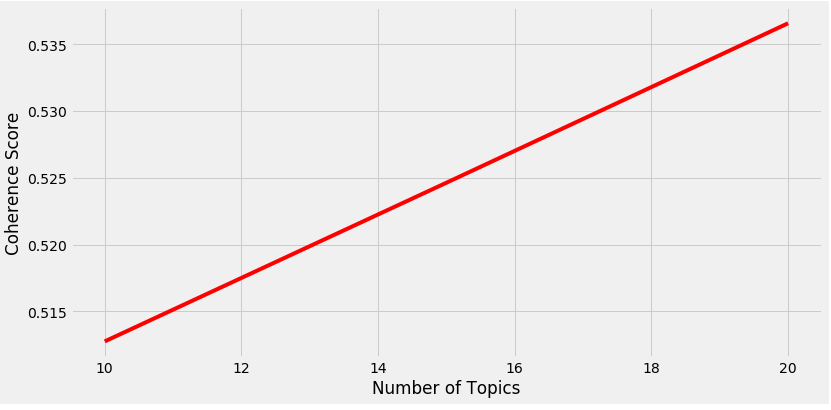

# Topic Modeling Scatter Plot

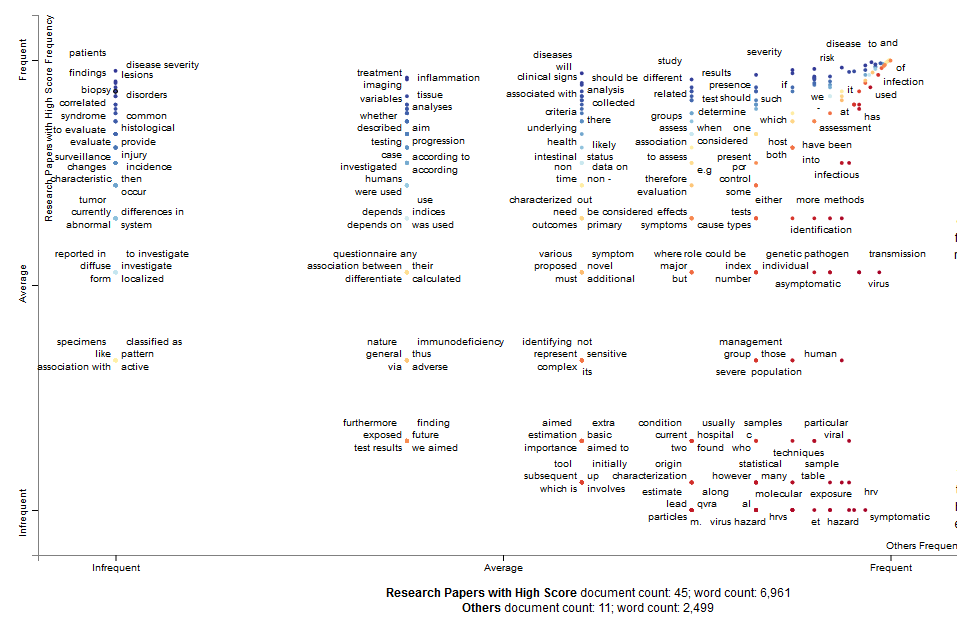

#  SciBERT Processing


> We used pretrained model 'scibert-nli' which is a fine-tuned version of AllenAI's SciBERT. 
> SciBERT from AllenAI is trained on Corpus with 1.14M papers (Scientific Journals), 3.1B tokens. 
> We use the full text of the papers in our processing to provide best answers.

In [ ]:
#Load SciBERT Model
MODEL_PATH='/kaggle/input/scibertnli/scibert-nli'
model = SentenceTransformer(MODEL_PATH)

In [ ]:
#Corpus Building and mapping index of Paper-ID
corpus_dictionary = {}
corpus = []
idx = 0
for _, row in aggregate_df.iterrows():
    if isinstance(row['body'], str):
        if row['body'] != "Unknown":
            if len(row['body']) > 900:
                corpus.append(row['body'])
                corpus_dictionary[idx] = row['paper_id']   
                idx +=1

In [ ]:
#Building/Loading Corpus
CORPUS_PATH='/kaggle/input/scibertnli/corpus.pkl'
if not os.path.exists(CORPUS_PATH):
    print("Caching the corpus for future use...")
    with open('corpus.pkl', 'wb') as file:
        pickle.dump(corpus, file)
else:
    print("Loading the corpus from", CORPUS_PATH, '...')
    with open(CORPUS_PATH, 'rb') as corpus_pt:
        corpus = pickle.load(corpus_pt)

In [ ]:
#Building/Loading Embeddings
EMBEDDINGS_FILE='/kaggle/input/scibertembeddings/scibertnliembeddings.pkl'
if not os.path.exists(EMBEDDINGS_FILE):
        print("Computing and caching model embeddings for future use...")
        embeddings = model.encode(corpus, show_progress_bar=True)
        with open(EMBEDDINGS_FILE, 'wb') as file:
            pickle.dump(embeddings, file)
else:
        print("Loading model embeddings from", EMBEDDINGS_FILE, '...')
        with open(EMBEDDINGS_FILE, 'rb') as file:
            embeddings = pickle.load(file)

In [ ]:
#Process Text
def clean(text):
    t = text.lower()
    t = strip_characters(t)
    t = str(t).translate(table)
    return t

def tokenize(text):
    words = nltk.word_tokenize(text)
    return list(set([word for word in words 
                     if len(word) > 1
                     and not word in english_stopwords
                     and not (word.isnumeric() and len(word) is not 4)
                     and (not word.isnumeric() or word.isalpha())] )
               )

def preprocess(text):
    t = clean(text)    
    tokens = tokenize(t)   
    return tokens

def strip_characters(text):
    t = re.sub('\(|\)|:|,|;|\.|’|”|“|\?|%|>|<', '', text)
    t = re.sub('/', ' ', t)
    t = t.replace("'",'')
    return t

In [ ]:
#Task7 Questions
task7 = [
"What do we know about diagnostics and surveillance?", 
"What has been published concerning systematic, holistic approach to diagnostics (from the public health surveillance perspective to being able to predict clinical outcomes)?",     
"What are the sampling methods available to determine asymptomatic disease like use of serosurveys such as convalescent samples?",
"What do we know about early detection of disease like use of screening of neutralizing antibodies such as ELISAs?",
"What is known about efforts to increase capacity on existing diagnostic platforms and tap into existing surveillance platforms",
"What do we know about recruitment, support, and coordination of local expertise and capacity via public, private—commercial issues?",
"What do we know about recruitment, support, and coordination of local expertise and capacity via non-profit, including academic, including legal, ethical, communications, and operational issues?",
"During a pandemic, how to increase coordination between local, public and private?",
"During a pandemic, how to increase coordination between local, non-profit, academic, legal and ethical?",
"How states in US might leverage universities and private laboratories for testing purposes?",
"How states in US might leverage universities and private laboratories for communications to public health officials?",
"How states in US might leverage universities and private laboratories for communications to the public?",
"Development of a point-of-care test like a rapid influenza test recognizing the tradeoffs between speed, accessibility, and accuracy",
"Development of a point-of-care test like a rapid bed-side tests, recognizing the tradeoffs between speed, accessibility, and accuracy",
"Rapid design and execution of targeted surveillance experiments calling for all potential testers using PCR in a defined area to start testing and report to a specific entity",
"Separation of assay development issues from instruments",
"Separation of assay development issues from the role of the private sector to help quickly migrate assays onto those devices",
"Efforts to track the evolution of the virus like genetic drift and avoid locking into specific reagents and surveillance as well as detection schemes",
"Efforts to track the evolution of the virus like mutations and avoid locking into specific reagents and surveillance as well as detection schemes",
"Latency issues and when there is sufficient viral load to detect the pathogen",
"Latency issues and when there is sufficient viral load in understanding of what is needed in terms of biological sampling",
"Latency issues and when there is sufficient viral load in understanding of what is needed in terms of environmental sampling",
"Use of diagnostics such as host response markers like cytokines to detect early disease",
"Use of diagnostics such as host response markers like cytokines to predict severe disease progression",
"Policies and protocols for screening and testing",
"Policies to mitigate the effects on supplies associated with mass testing",
"Policies to mitigate the effects on supplies associated with testing of swabs and reagents",
"Technology roadmap for diagnostics of COVID-19",
"Barriers to developing and scaling up new diagnostic tests",
"Barriers to developing and scaling up future coalition and accelerator models like Coalition for Epidemic Preparedness",
"Barriers to developing and scaling up innovations that could provide critical funding for diagnostics",
"Barriers to developing and scaling up opportunities for a streamlined regulatory environment",
"New platforms and technology like CRISPR to improve response times",
"New platforms and technology like CRISPR to employ more holistic approaches to COVID-19",
"New platforms and technology like CRISPR to employ more holistic approaches to future diseases",
"Coupling genomics and diagnostic testing on a large scale",
"Enhance capabilities for rapid sequencing to target regions of the genome that will allow specificity for a particular variant",
"Enhance capabilities for bioinformatics to target regions of the genome that will allow specificity for a particular variant",
"One Health surveillance of humans and potential sources of future spillover",
"One Health surveillance of humans ongoing exposure to hosts like bats",
"One Health surveillance of humans on transmission hosts like heavily trafficked and farmed wildlife",
"One Health surveillance of humans on transmission hosts like domestic food and companion species",
"One Health surveillance of humans and potential sources of future spillover on transmission hosts that includes environmental, demographic, and occupational risk factors" 
]

tasks={'What do we know about diagnostics and surveillance?': task7}


# We had used 3 distance measures to provide best answers. We had found sometimes different distance measures are bringing good articles

In [ ]:
# Function to find out relavent articles using 3 distance measures. 
def ask_question_cosine(query, model, corpus, corpus_embed, task, measure, top_k=5):   
    queries = [query]
    query_embeds = model.encode(queries, show_progress_bar=False)
    for query, query_embed in zip(queries, query_embeds):
        distances = scipy.spatial.distance.cdist([query_embed], corpus_embed, measure)[0]
        distances = zip(range(len(distances)), distances)
        distances = sorted(distances, key=lambda x: x[1])
        
        results = []
        
        for count, (idx, distance) in enumerate(distances[:top_k]):
            results.append([count + 1, corpus[idx].strip(), task, measure, corpus_dictionary[idx], round(1 - distance, 4)])
            
    return results

In [ ]:
# Function to create results in a dataframe
def get_bert_results(tasks, model, corpus, embeddings, distance_measure):   
    results = []
    
    #distance_measure = ['cosine','chebyshev','canberra']
    #distance_measure = ['cosine']   
    for task in tasks:
        task_text = ' '.join(preprocess(task)[:8])
        for dist_measure in distance_measure:
            results.append(ask_question_cosine(task_text, model,corpus,embeddings,task,dist_measure))
    
    return results


def get_bert_result_df(df, tasks, model, corpus, embeddings):
    bertresults_df = pd.DataFrame(columns=['Task', 'Distance_Measure','URL', 'Publish_Date','Title','Paper_Id','Summary' ])
    #bertresults_df = pd.DataFrame(columns=['Task', 'Distance_Measure','Score','URL', 'Publish_Date', 'Journal', 'Title','paper_id' ])
   
    #bert_results = []
    #article_ids = []
    distance_measure = ['cosine','cityblock','sqeuclidean']
    bert_results= get_bert_results(tasks, model, corpus, embeddings, distance_measure)
    #bert_results= get_bert_results(tasks, model, corpus, embeddings,distance_measure)
    #article_ids = get_article_ids(df, bert_results)
    
    for ber in bert_results:
        for rel in ber:
            matched_row = df[df['paper_id']==rel[4]]
            url = matched_row.url.values[0]
            publish_time = matched_row.publish_time.values[0]
            #journal = matched_row.journal.values[0]
            title = matched_row.title.values[0]
            bertsummary = summarize(rel[1],ratio=0.02)
            #score = str(int(round(rel[5]*100))) 
            #score = str(rel[5])
            task = rel[2]
            dist = rel[3]
            #bertresults_df = bertresults_df.append({'Task':task, 'Distance_Measure':dist,'URL':url, 'Publish_Date':publish_time, 'Journal':journal, 'Title':title,'SciBERTSummary':bertsummary, 'paper_id':rel[4]},ignore_index=True)
            bertresults_df = bertresults_df.append({'Task':task, 'Distance_Measure':dist, 'URL':url, 'Publish_Date':publish_time, 'Title':title,'Paper_Id':rel[4],'Summary':bertsummary},ignore_index=True)
    
    return bertresults_df 

In [ ]:
# This function block helps to create a nice HTML format to visualize

def generate_html_table(df):

    css_style = """table.paleBlueRows {
      font-family: "Trebuchet MS", Helvetica, sans-serif;
      border: 1px solid #FFFFFF;
      width: 100%;
      height: 150px;
      text-align: center;
      border-collapse: collapse;
    }
    table.paleBlueRows td, table.paleBlueRows th {
      text-align: center;
      border: 1px solid #FFFFFF;
      padding: 3px 2px;
    }
    table.paleBlueRows tbody td {
      text-align: center;
      font-size: 11px;
    }
    table.paleBlueRows tr:nth-child(even) {
      background: #D0E4F5;
    }
    table.paleBlueRows thead {
      background: #0B6FA4;
      border-bottom: 5px solid #FFFFFF;
    }
    table.paleBlueRows thead th {
      font-size: 17px;
      font-weight: bold;
      color: #FFFFFF;
      border-left: 2px solid #FFFFFF;
    }
    table.paleBlueRows thead th:first-child {
      border-left: none;
    }

    table.paleBlueRows tfoot {
      font-size: 14px;
      font-weight: bold;
      color: #333333;
      background: #D0E4F5;
      border-top: 3px solid #444444;
    }
    table.paleBlueRows tfoot td {
      font-size: 14px;
    }
    div.scrollable {width:100%; max-height:150px; overflow:auto; text-align: center;}
    """

    from yattag import Doc, indent
    doc, tag, text, line = Doc().ttl()

    with tag("head"):
        with tag("style"):
            text(css_style)

    with tag('table', klass='paleBlueRows'):
        with tag("tr"):
            for col in list(df.columns):
                with tag("th"):
                     with tag("div", klass = "scrollable"):
                        text(col)
        for idx, row in df.iterrows():
            with tag('tr'):
                for i in range(len(row)):
                    with tag('td'):
                        with tag("div", klass = "scrollable"):
                            try:
                                if "http" in str(row[i]):
                                    with tag("a", href = str(row[i])):
                                        text(str(row[i]))
                                else:
                                    text(str(row[i]))
                            except:
                                print(row[i])

    #display(HTML(doc.getvalue()))
    return(doc.getvalue())

In [ ]:
%%time
#Run the model and generate results
bert_results_df = get_bert_result_df(aggregate_df, task7, model, corpus, embeddings)

# We have seen in our model building and training differnt distance measures were providing distanct and better results

In [ ]:
#Drop the duplicate articles extracted by all three distance measures.
bert_results_df.drop_duplicates(subset='Paper_Id', keep="first", inplace=True)
bert_results_df['Publish_Date'] = bert_results_df['Publish_Date'].dt.date

In [ ]:
#Provides top 5 Articles
bert_results_df.head(5)

In [ ]:
# Save the HTML for later viewing
berthtml = generate_html_table(bert_results_df.sort_values(by=['Publish_Date'], ascending=False))
#display(HTML(berthtml))
%store berthtml >results.html

In [ ]:
#Sort the results in decending order by Publish Data
bert_results_df.sort_values(by=['Publish_Date'], ascending=False,inplace=True)

In [ ]:
#Interactive way to show the top Journals
task_list = list(np.unique(bert_results_df['Task'].tolist()))
task_list.insert(0, "Please select a question")

cols = ["Paper_Id", "Title", "URL", "Publish_Date", "Summary"]

@interact
def dropdowns(Question = task_list):
    if Question == "Please select a question":
        pass
    else:   
        print (Question)
        display(HTML(generate_html_table(bert_results_df[bert_results_df['Task'].str.strip() == str(Question).strip()][cols])))

# Distance Measure Plot

In [ ]:
#Plot to show Distance Measure Mix
ax = sns.countplot(x="Distance_Measure", data = bert_results_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)

## License Agreements

#### PSF LICENSE AGREEMENT FOR PYTHON 3.8.2
1. This LICENSE AGREEMENT is between the Python Software Foundation ("PSF"), and
   the Individual or Organization ("Licensee") accessing and otherwise using Python
   3.8.2 software in source or binary form and its associated documentation.

2. Subject to the terms and conditions of this License Agreement, PSF hereby
   grants Licensee a nonexclusive, royalty-free, world-wide license to reproduce,
   analyze, test, perform and/or display publicly, prepare derivative works,
   distribute, and otherwise use Python 3.8.2 alone or in any derivative
   version, provided, however, that PSF's License Agreement and PSF's notice of
   copyright, i.e., "Copyright © 2001-2020 Python Software Foundation; All Rights
   Reserved" are retained in Python 3.8.2 alone or in any derivative version
   prepared by Licensee.

3. In the event Licensee prepares a derivative work that is based on or
   incorporates Python 3.8.2 or any part thereof, and wants to make the
   derivative work available to others as provided herein, then Licensee hereby
   agrees to include in any such work a brief summary of the changes made to Python
   3.8.2.

4. PSF is making Python 3.8.2 available to Licensee on an "AS IS" basis.
   PSF MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR IMPLIED.  BY WAY OF
   EXAMPLE, BUT NOT LIMITATION, PSF MAKES NO AND DISCLAIMS ANY REPRESENTATION OR
   WARRANTY OF MERCHANTABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE
   USE OF PYTHON 3.8.2 WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. PSF SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF PYTHON 3.8.2
   FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR LOSS AS A RESULT OF
   MODIFYING, DISTRIBUTING, OR OTHERWISE USING PYTHON 3.8.2, OR ANY DERIVATIVE
   THEREOF, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material breach of
   its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any relationship
   of agency, partnership, or joint venture between PSF and Licensee.  This License
   Agreement does not grant permission to use PSF trademarks or trade name in a
   trademark sense to endorse or promote products or services of Licensee, or any
   third party.

8. By copying, installing or otherwise using Python 3.8.2, Licensee agrees
   to be bound by the terms and conditions of this License Agreement.
 
 
#### The 3-Clause BSD License
 
Note: This license has also been called the "New BSD License" or "Modified BSD License". See also the 2-clause BSD License.

Copyright <YEAR> <COPYRIGHT HOLDER>

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

#### NumPy license
Copyright © 2005-2020, NumPy Developers.
All rights reserved.
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of the NumPy Developers nor the names of any contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

 
#### The MIT License
 
Copyright <YEAR> <COPYRIGHT HOLDER>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

  
#### License agreement for matplotlib versions 1.3.0 and later
=========================================================

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in any derivative version prepared by
Licensee.

3. In the event Licensee prepares a derivative work that is based on or
incorporates matplotlib or any part thereof, and wants to
make the derivative work available to others as provided herein, then
Licensee hereby agrees to include in any such work a brief summary of
the changes made to matplotlib .

4. MDT is making matplotlib available to Licensee on an "AS
IS" basis.  MDT MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR
IMPLIED.  BY WAY OF EXAMPLE, BUT NOT LIMITATION, MDT MAKES NO AND
DISCLAIMS ANY REPRESENTATION OR WARRANTY OF MERCHANTABILITY OR FITNESS
FOR ANY PARTICULAR PURPOSE OR THAT THE USE OF MATPLOTLIB
WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. MDT SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF MATPLOTLIB
 FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR
LOSS AS A RESULT OF MODIFYING, DISTRIBUTING, OR OTHERWISE USING
MATPLOTLIB , OR ANY DERIVATIVE THEREOF, EVEN IF ADVISED OF
THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material
breach of its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any
relationship of agency, partnership, or joint venture between MDT and
Licensee.  This License Agreement does not grant permission to use MDT
trademarks or trade name in a trademark sense to endorse or promote
products or services of Licensee, or any third party.

8. By copying, installing or otherwise using matplotlib ,
Licensee agrees to be bound by the terms and conditions of this License
Agreement.
 
#### 3-clause license ("BSD License 2.0", "Revised BSD License", "New BSD License", or "Modified BSD License")
Copyright (c) <year>, <copyright holder>
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
 
#### Apache License

Version 2.0, January 2004

http://www.apache.org/licenses/

TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

1. Definitions.

"License" shall mean the terms and conditions for use, reproduction, and distribution as defined by Sections 1 through 9 of this document.

"Licensor" shall mean the copyright owner or entity authorized by the copyright owner that is granting the License.

"Legal Entity" shall mean the union of the acting entity and all other entities that control, are controlled by, or are under common control with that entity. For the purposes of this definition, "control" means (i) the power, direct or indirect, to cause the direction or management of such entity, whether by contract or otherwise, or (ii) ownership of fifty percent (50%) or more of the outstanding shares, or (iii) beneficial ownership of such entity.

"You" (or "Your") shall mean an individual or Legal Entity exercising permissions granted by this License.

"Source" form shall mean the preferred form for making modifications, including but not limited to software source code, documentation source, and configuration files.

"Object" form shall mean any form resulting from mechanical transformation or translation of a Source form, including but not limited to compiled object code, generated documentation, and conversions to other media types.

"Work" shall mean the work of authorship, whether in Source or Object form, made available under the License, as indicated by a copyright notice that is included in or attached to the work (an example is provided in the Appendix below).

"Derivative Works" shall mean any work, whether in Source or Object form, that is based on (or derived from) the Work and for which the editorial revisions, annotations, elaborations, or other modifications represent, as a whole, an original work of authorship. For the purposes of this License, Derivative Works shall not include works that remain separable from, or merely link (or bind by name) to the interfaces of, the Work and Derivative Works thereof.

"Contribution" shall mean any work of authorship, including the original version of the Work and any modifications or additions to that Work or Derivative Works thereof, that is intentionally submitted to Licensor for inclusion in the Work by the copyright owner or by an individual or Legal Entity authorized to submit on behalf of the copyright owner. For the purposes of this definition, "submitted" means any form of electronic, verbal, or written communication sent to the Licensor or its representatives, including but not limited to communication on electronic mailing lists, source code control systems, and issue tracking systems that are managed by, or on behalf of, the Licensor for the purpose of discussing and improving the Work, but excluding communication that is conspicuously marked or otherwise designated in writing by the copyright owner as "Not a Contribution."

"Contributor" shall mean Licensor and any individual or Legal Entity on behalf of whom a Contribution has been received by Licensor and subsequently incorporated within the Work.

2. Grant of Copyright License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable copyright license to reproduce, prepare Derivative Works of, publicly display, publicly perform, sublicense, and distribute the Work and such Derivative Works in Source or Object form.

3. Grant of Patent License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable (except as stated in this section) patent license to make, have made, use, offer to sell, sell, import, and otherwise transfer the Work, where such license applies only to those patent claims licensable by such Contributor that are necessarily infringed by their Contribution(s) alone or by combination of their Contribution(s) with the Work to which such Contribution(s) was submitted. If You institute patent litigation against any entity (including a cross-claim or counterclaim in a lawsuit) alleging that the Work or a Contribution incorporated within the Work constitutes direct or contributory patent infringement, then any patent licenses granted to You under this License for that Work shall terminate as of the date such litigation is filed.

4. Redistribution. You may reproduce and distribute copies of the Work or Derivative Works thereof in any medium, with or without modifications, and in Source or Object form, provided that You meet the following conditions:

You must give any other recipients of the Work or Derivative Works a copy of this License; and
You must cause any modified files to carry prominent notices stating that You changed the files; and
You must retain, in the Source form of any Derivative Works that You distribute, all copyright, patent, trademark, and attribution notices from the Source form of the Work, excluding those notices that do not pertain to any part of the Derivative Works; and
If the Work includes a "NOTICE" text file as part of its distribution, then any Derivative Works that You distribute must include a readable copy of the attribution notices contained within such NOTICE file, excluding those notices that do not pertain to any part of the Derivative Works, in at least one of the following places: within a NOTICE text file distributed as part of the Derivative Works; within the Source form or documentation, if provided along with the Derivative Works; or, within a display generated by the Derivative Works, if and wherever such third-party notices normally appear. The contents of the NOTICE file are for informational purposes only and do not modify the License. You may add Your own attribution notices within Derivative Works that You distribute, alongside or as an addendum to the NOTICE text from the Work, provided that such additional attribution notices cannot be construed as modifying the License.

You may add Your own copyright statement to Your modifications and may provide additional or different license terms and conditions for use, reproduction, or distribution of Your modifications, or for any such Derivative Works as a whole, provided Your use, reproduction, and distribution of the Work otherwise complies with the conditions stated in this License.
5. Submission of Contributions. Unless You explicitly state otherwise, any Contribution intentionally submitted for inclusion in the Work by You to the Licensor shall be under the terms and conditions of this License, without any additional terms or conditions. Notwithstanding the above, nothing herein shall supersede or modify the terms of any separate license agreement you may have executed with Licensor regarding such Contributions.

6. Trademarks. This License does not grant permission to use the trade names, trademarks, service marks, or product names of the Licensor, except as required for reasonable and customary use in describing the origin of the Work and reproducing the content of the NOTICE file.

7. Disclaimer of Warranty. Unless required by applicable law or agreed to in writing, Licensor provides the Work (and each Contributor provides its Contributions) on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied, including, without limitation, any warranties or conditions of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A PARTICULAR PURPOSE. You are solely responsible for determining the appropriateness of using or redistributing the Work and assume any risks associated with Your exercise of permissions under this License.

8. Limitation of Liability. In no event and under no legal theory, whether in tort (including negligence), contract, or otherwise, unless required by applicable law (such as deliberate and grossly negligent acts) or agreed to in writing, shall any Contributor be liable to You for damages, including any direct, indirect, special, incidental, or consequential damages of any character arising as a result of this License or out of the use or inability to use the Work (including but not limited to damages for loss of goodwill, work stoppage, computer failure or malfunction, or any and all other commercial damages or losses), even if such Contributor has been advised of the possibility of such damages.

9. Accepting Warranty or Additional Liability. While redistributing the Work or Derivative Works thereof, You may choose to offer, and charge a fee for, acceptance of support, warranty, indemnity, or other liability obligations and/or rights consistent with this License. However, in accepting such obligations, You may act only on Your own behalf and on Your sole responsibility, not on behalf of any other Contributor, and only if You agree to indemnify, defend, and hold each Contributor harmless for any liability incurred by, or claims asserted against, such Contributor by reason of your accepting any such warranty or additional liability.

END OF TERMS AND CONDITIONS

#### Software License
The Python Imaging Library (PIL) is

    Copyright © 1997-2011 by Secret Labs AB
    Copyright © 1995-2011 by Fredrik Lundh

By obtaining, using, and/or copying this software and/or its associated documentation, you agree that you have read, understood, and will comply with the following terms and conditions:

Permission to use, copy, modify, and distribute this software and its associated documentation for any purpose and without fee is hereby granted, provided that the above copyright notice appears in all copies, and that both that copyright notice and this permission notice appear in supporting documentation, and that the name of Secret Labs AB or the author not be used in advertising or publicity pertaining to distribution of the software without specific, written prior permission.

SECRET LABS AB AND THE AUTHOR DISCLAIMS ALL WARRANTIES WITH REGARD TO THIS SOFTWARE, INCLUDING ALL IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS. IN NO EVENT SHALL SECRET LABS AB OR THE AUTHOR BE LIABLE FOR ANY SPECIAL, INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER RESULTING FROM LOSS OF USE, DATA OR PROFITS, WHETHER IN AN ACTION OF CONTRACT, NEGLIGENCE OR OTHER TORTIOUS ACTION, ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF THIS SOFTWARE.


#### SciPy license
Copyright © 2001, 2002 Enthought, Inc.
All rights reserved.

Copyright © 2003-2019 SciPy Developers.
All rights reserved.
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of Enthought nor the names of the SciPy Developers may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE REGENTS OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

**Ericsson, the world’s leading telecommunications company, cares about doing good. This task was completed as part of our Ericsson for Good program, which allows our 90,000+ employees to contribute to their communities.**

© This Notebook has been released under the OSI-approved GNU LGPLv2.1 license; Google BERT is under Apache License 2.0 (https://github.com/google-research/bert/blob/master/LICENSE); Facebook’s fairseq is under MIT license: https://github.com/pytorch/fairseq/blob/master/LICENSE